# US Election 2020 Election Forecasting Using Polling Data for Simulations

![](https://i.imgur.com/XxjbFK6.jpg?1)

We'll be using the Latest Polls dataset from [FiveThirtyEight](https://data.fivethirtyeight.com/)

![](https://i.imgur.com/2ROon41.png?2
)
- The file we'll be using is called *presidential_poll.csv*

## Steps

1. Understanding our dataset from [FiveThirtyEight](https://data.fivethirtyeight.com/)
2. Cleaning and Exploring our Data
3. Changing our Data Layout
4. Understanind the US Electoral Process
5. Visualizations
6. Statistical Interpretation and Averaging of Polls
7. Simulating Elections Statistically 
8. Result Analysis
9. Visualizng Results on a Map

In [97]:
import pandas as pd
import numpy as np

# I've already downloaded it here but feel free to download and upload a more recent poll
url='https://github.com/rajeevratan84/datascienceforbusiness/blob/master/president_polls.csv?raw=true'
df = pd.read_csv(url)
df.head()

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,created_at,notes,url,stage,race_id,answer,candidate_id,candidate_name,candidate_party,pct
0,133816,71450,2020,Ohio,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 10:30,NaN,https://www.rasmussenreports.com/public_conten...,general,6246,Biden,13256,Joseph R. Biden Jr.,DEM,48.0
1,133816,71450,2020,Ohio,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 10:30,NaN,https://www.rasmussenreports.com/public_conten...,general,6246,Trump,13254,Donald Trump,REP,47.0
2,133838,71457,2020,Pennsylvania,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 13:21,NaN,https://www.rasmussenreports.com/public_conten...,general,6249,Biden,13256,Joseph R. Biden Jr.,DEM,50.0
3,133838,71457,2020,Pennsylvania,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 13:21,NaN,https://www.rasmussenreports.com/public_conten...,general,6249,Trump,13254,Donald Trump,REP,47.0
4,133777,71435,2020,Georgia,1102,Emerson College,1446,NewsNation,Emerson College,88.0,...,10/19/20 20:06,NaN,https://emersonpolling.reportablenews.com/pr/g...,general,6221,Biden,13256,Joseph R. Biden Jr.,DEM,47.0


In [98]:
df.columns

Index(['question_id', 'poll_id', 'cycle', 'state', 'pollster_id', 'pollster',
       'sponsor_ids', 'sponsors', 'display_name', 'pollster_rating_id',
       'pollster_rating_name', 'fte_grade', 'sample_size', 'population',
       'population_full', 'methodology', 'office_type', 'seat_number',
       'seat_name', 'start_date', 'end_date', 'election_date',
       'sponsor_candidate', 'internal', 'partisan', 'tracking',
       'nationwide_batch', 'ranked_choice_reallocated', 'created_at', 'notes',
       'url', 'stage', 'race_id', 'answer', 'candidate_id', 'candidate_name',
       'candidate_party', 'pct'],
      dtype='object')

In [99]:
df['race_id'].describe()

count    11909.000000
mean      6246.252918
std        208.292746
min       6210.000000
25%       6210.000000
50%       6220.000000
75%       6244.000000
max       8718.000000
Name: race_id, dtype: float64

In [100]:
df = df [['question_id','poll_id','state', 'pollster','start_date','end_date','answer','pct']]
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Trump,47.0
4,133777,71435,Georgia,Emerson College,10/17/20,10/19/20,Biden,47.0
...,...,...,...,...,...,...,...,...
11904,92081,57026,Ohio,Public Policy Polling,11/27/18,11/28/18,Trump,46.0
11905,92082,57026,Ohio,Public Policy Polling,11/27/18,11/28/18,Warren,43.0
11906,92082,57026,Ohio,Public Policy Polling,11/27/18,11/28/18,Trump,49.0
11907,92078,57025,NaN,Rasmussen Reports/Pulse Opinion Research,11/12/18,11/13/18,Obama,50.0


In [101]:
print(len(df['pollster'].unique()))

196


In [102]:
df['start_date'].unique()

array(['10/18/20', '10/17/20', '10/15/20', '10/13/20', '10/6/20',
       '10/16/20', '10/14/20', '10/5/20', '9/21/20', '9/20/20',
       '10/12/20', '10/4/20', '9/19/20', '10/3/20', '9/18/20', '10/11/20',
       '10/9/20', '10/2/20', '9/17/20', '10/10/20', '10/7/20', '10/1/20',
       '9/16/20', '10/8/20', '9/30/20', '9/15/20', '9/29/20', '9/14/20',
       '9/28/20', '9/27/20', '9/26/20', '9/25/20', '9/22/20', '9/24/20',
       '9/23/20', '9/1/20', '9/13/20', '9/12/20', '9/10/20', '9/11/20',
       '9/9/20', '9/8/20', '9/7/20', '9/6/20', '9/5/20', '9/4/20',
       '9/3/20', '9/2/20', '8/31/20', '8/29/20', '8/30/20', '8/28/20',
       '8/27/20', '8/26/20', '8/25/20', '8/24/20', '8/23/20', '8/22/20',
       '8/21/20', '8/20/20', '8/19/20', '8/18/20', '8/1/20', '8/17/20',
       '8/16/20', '8/15/20', '8/14/20', '8/13/20', '8/12/20', '8/11/20',
       '8/9/20', '8/10/20', '8/8/20', '8/7/20', '8/6/20', '8/5/20',
       '8/4/20', '8/3/20', '8/2/20', '7/31/20', '7/30/20', '7/28/20',
       '7

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11909 entries, 0 to 11908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   question_id  11909 non-null  int64  
 1   poll_id      11909 non-null  int64  
 2   state        7363 non-null   object 
 3   pollster     11909 non-null  object 
 4   start_date   11909 non-null  object 
 5   end_date     11909 non-null  object 
 6   answer       11909 non-null  object 
 7   pct          11909 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 744.4+ KB


In [104]:
# DataTime in object type. We have to change it to date time format
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11909 entries, 0 to 11908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   question_id  11909 non-null  int64         
 1   poll_id      11909 non-null  int64         
 2   state        7363 non-null   object        
 3   pollster     11909 non-null  object        
 4   start_date   11909 non-null  datetime64[ns]
 5   end_date     11909 non-null  datetime64[ns]
 6   answer       11909 non-null  object        
 7   pct          11909 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 744.4+ KB


In [105]:
# Sanity check to make sure we didn't mess up anything
df.head(10)

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0
4,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0
5,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Trump,48.4
6,133810,71446,NaN,IBD/TIPP,2020-10-15,2020-10-19,Biden,48.1
7,133810,71446,NaN,IBD/TIPP,2020-10-15,2020-10-19,Trump,45.8
8,133810,71446,NaN,IBD/TIPP,2020-10-15,2020-10-19,Jorgensen,3.0
9,133810,71446,NaN,IBD/TIPP,2020-10-15,2020-10-19,Hawkins,0.9


In [106]:
a=df['start_date'].unique()
print(a[0])
print(a[-1])

2020-10-18T00:00:00.000000000
2018-11-12T00:00:00.000000000


In [107]:
a=df['end_date'].unique()
print(a[0],'\n')
print(a[-1])

2020-10-19T00:00:00.000000000 

2018-11-13T00:00:00.000000000


In [108]:
start_date = '2020-08-01'
end_date = '2020-11-02'

mask = (df['start_date']>=start_date) & (df['end_date']<= end_date)
mask.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [109]:
df = df.loc[mask]
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.00
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.00
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.00
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.00
4,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.00
...,...,...,...,...,...,...,...,...
5288,127307,67986,NaN,Morning Consult,2020-08-01,2020-08-03,Trump,42.00
5289,132507,70853,NaN,SurveyMonkey,2020-08-01,2020-08-03,Biden,52.72
5290,132507,70853,NaN,SurveyMonkey,2020-08-01,2020-08-03,Trump,44.88
5291,132632,70853,NaN,SurveyMonkey,2020-08-01,2020-08-03,Biden,51.92


In [110]:
df['answer'].unique()

array(['Biden', 'Trump', 'Jorgensen', 'Hawkins', 'West', 'Pence',
       'Harris', 'Blankenship', 'De La Fuente', 'La Riva', 'Pierce',
       'Kennedy', 'Simmons'], dtype=object)

In [111]:
canidates = ['Trump','Biden']
df = df.loc[df['answer'].isin(canidates)]
df.answer.unique()

array(['Biden', 'Trump'], dtype=object)

In [112]:
len(df['state'])

4648

In [113]:
df['state'].isnull().sum()

1446

In [114]:
df = df[df['state'].notna()]
df['state'].isnull().sum()

0

In [115]:
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0
4,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0
...,...,...,...,...,...,...,...,...
5272,127578,68114,Florida,OnMessage Inc.,2020-08-02,2020-08-04,Trump,49.0
5273,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Biden,50.0
5274,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Trump,46.0
5275,127580,68116,Wisconsin,OnMessage Inc.,2020-08-02,2020-08-04,Biden,47.0


# Notice how each poll occupies two lines

In [116]:
len(df.poll_id.unique())

1062

# Changing Our Data Layout
We need to put the polls on a single line for easier data processing

In [117]:
len(df)

3202

In [118]:
df.tail(5)

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
5272,127578,68114,Florida,OnMessage Inc.,2020-08-02,2020-08-04,Trump,49.0
5273,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Biden,50.0
5274,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Trump,46.0
5275,127580,68116,Wisconsin,OnMessage Inc.,2020-08-02,2020-08-04,Biden,47.0
5276,127580,68116,Wisconsin,OnMessage Inc.,2020-08-02,2020-08-04,Trump,47.0


In [119]:
df.index = np.arange(1, len(df) + 1)
print(df.index)

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            3193, 3194, 3195, 3196, 3197, 3198, 3199, 3200, 3201, 3202],
           dtype='int64', length=3202)


In [120]:
df.tail(5)

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
3198,127578,68114,Florida,OnMessage Inc.,2020-08-02,2020-08-04,Trump,49.0
3199,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Biden,50.0
3200,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Trump,46.0
3201,127580,68116,Wisconsin,OnMessage Inc.,2020-08-02,2020-08-04,Biden,47.0
3202,127580,68116,Wisconsin,OnMessage Inc.,2020-08-02,2020-08-04,Trump,47.0


In [121]:
df.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            3193, 3194, 3195, 3196, 3197, 3198, 3199, 3200, 3201, 3202],
           dtype='int64', length=3202)

In [122]:
df.index+1

Int64Index([   2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
            ...
            3194, 3195, 3196, 3197, 3198, 3199, 3200, 3201, 3202, 3203],
           dtype='int64', length=3202)

In [123]:
df['join_index'] = df.index+1
df['join_index']

1          2
2          3
3          4
4          5
5          6
        ... 
3198    3199
3199    3200
3200    3201
3201    3202
3202    3203
Name: join_index, Length: 3202, dtype: int64

In [124]:
df.head(5)

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,join_index
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0,2
2,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,3
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0,4
4,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,5
5,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0,6


In [125]:
for i in range(10):
    a = i % 2
    print(a)

0
1
0
1
0
1
0
1
0
1


In [126]:
odd_rows = df[df.index % 2 == 1]
odd_rows

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,join_index
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0,2
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0,4
5,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0,6
7,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,8
9,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,10
...,...,...,...,...,...,...,...,...,...
3193,127277,67973,Arizona,OH Predictive Insights,2020-08-03,2020-08-04,Biden,49.0,3194
3195,127577,68113,Arizona,OnMessage Inc.,2020-08-02,2020-08-04,Biden,48.0,3196
3197,127578,68114,Florida,OnMessage Inc.,2020-08-02,2020-08-04,Biden,49.0,3198
3199,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Biden,50.0,3200


In [127]:
df.head(5)

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,join_index
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0,2
2,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,3
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0,4
4,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,5
5,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0,6


In [128]:
# Get the odd rows 
odd_rows = df[df.index % 2 == 1]

# Now we join them
grouped = odd_rows.join(df, on="join_index",rsuffix=" second")
grouped

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,join_index,question_id second,poll_id second,state second,pollster second,start_date second,end_date second,answer second,pct second,join_index second
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0,2,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,3
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0,4,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,5
5,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0,6,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Trump,48.4,7
7,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,8,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,9
9,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,10,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,127277,67973,Arizona,OH Predictive Insights,2020-08-03,2020-08-04,Biden,49.0,3194,127277,67973,Arizona,OH Predictive Insights,2020-08-03,2020-08-04,Trump,45.0,3195
3195,127577,68113,Arizona,OnMessage Inc.,2020-08-02,2020-08-04,Biden,48.0,3196,127577,68113,Arizona,OnMessage Inc.,2020-08-02,2020-08-04,Trump,51.0,3197
3197,127578,68114,Florida,OnMessage Inc.,2020-08-02,2020-08-04,Biden,49.0,3198,127578,68114,Florida,OnMessage Inc.,2020-08-02,2020-08-04,Trump,49.0,3199
3199,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Biden,50.0,3200,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Trump,46.0,3201


In [129]:
grouped.state.unique()

array(['Ohio', 'Pennsylvania', 'Georgia', 'Wisconsin', 'Michigan',
       'Arizona', 'Texas', 'North Carolina', 'Wyoming', 'West Virginia',
       'Vermont', 'Virginia', 'Utah', 'South Dakota', 'South Carolina',
       'Oregon', 'Oklahoma', 'Nevada', 'New Mexico', 'New Jersey',
       'New Hampshire', 'Nebraska', 'North Dakota', 'Montana',
       'Mississippi', 'Minnesota', 'Maine', 'Maryland', 'Massachusetts',
       'Kentucky', 'Kansas', 'Indiana', 'Illinois', 'Idaho', 'Iowa',
       'Hawaii', 'Delaware', 'Connecticut', 'Arkansas', 'Alabama',
       'District of Columbia', 'Washington', 'Tennessee', 'Rhode Island',
       'New York', 'Missouri', 'Louisiana', 'Florida', 'Colorado',
       'California', 'Alaska', 'Maine CD-1', 'Maine CD-2',
       'Nebraska CD-2'], dtype=object)

In [130]:
grouped['state'] = grouped['state'].str.replace(r' CD-1', '')
grouped['state'] = grouped['state'].str.replace(r' CD-2', '')

In [131]:
grouped.state.unique()

array(['Ohio', 'Pennsylvania', 'Georgia', 'Wisconsin', 'Michigan',
       'Arizona', 'Texas', 'North Carolina', 'Wyoming', 'West Virginia',
       'Vermont', 'Virginia', 'Utah', 'South Dakota', 'South Carolina',
       'Oregon', 'Oklahoma', 'Nevada', 'New Mexico', 'New Jersey',
       'New Hampshire', 'Nebraska', 'North Dakota', 'Montana',
       'Mississippi', 'Minnesota', 'Maine', 'Maryland', 'Massachusetts',
       'Kentucky', 'Kansas', 'Indiana', 'Illinois', 'Idaho', 'Iowa',
       'Hawaii', 'Delaware', 'Connecticut', 'Arkansas', 'Alabama',
       'District of Columbia', 'Washington', 'Tennessee', 'Rhode Island',
       'New York', 'Missouri', 'Louisiana', 'Florida', 'Colorado',
       'California', 'Alaska'], dtype=object)

# Understanding the US Electoral Process
### The USA Electoral Map
#### There are 538 seats and 270 to win

Learn more about it here - https://www.bbc.com/news/world-us-canada-53558176

![Header Map](https://classroommagazines.scholastic.com/content/dam/classroom-magazines/magazines/election/election-2020/civics-in-action/the-electoral-college/ELECTION_ELECTORALCOLLEGE_HEADER_MAP.jpg)

In [132]:
#State with numbers of candidates
states = {
    "Alabama": 9,
    "Alaska": 3,
    "Arizona": 11,
    "Arkansas": 6,
    "California": 55,
    "Colorado": 9,
    "Connecticut": 7,
    "Delaware": 3,
    "District of Columbia": 3,
    "Florida": 29,
    "Georgia": 16,
    "Hawaii": 4,
    "Idaho": 4,
    "Illinois": 20,
    "Indiana": 11,
    "Iowa": 6,
    "Kansas": 6,
    "Kentucky": 8,
    "Louisiana": 8,
    "Maine": 4,
    "Maryland": 10,
    "Massachusetts": 11,
    "Michigan": 16,
    "Minnesota": 10,
    "Mississippi": 6,
    "Missouri": 10,
    "Montana": 3,
    "Nebraska": 5,
    "Nevada": 6,
    "New Hampshire": 4,
    "New Jersey": 14,
    "New Mexico": 5,
    "New York": 29,
    "North Carolina": 15,
    "North Dakota": 3,
    "Ohio": 18,
    "Oklahoma": 7,
    "Oregon": 7,
    "Pennsylvania": 20,
    "Rhode Island": 4,
    "South Carolina": 9,
    "South Dakota": 3,
    "Tennessee": 11,
    "Texas": 38,
    "Utah": 6,
    "Vermont": 3,
    "Virginia": 13,
    "Washington": 12,
    "West Virginia": 5,
    "Wisconsin": 10,
    "Wyoming": 3,
}

In [133]:
grouped.head(2)

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,join_index,question_id second,poll_id second,state second,pollster second,start_date second,end_date second,answer second,pct second,join_index second
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0,2,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,3
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0,4,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,5


In [134]:
def getBiden(row):  #grouped parameter is given for row
    return row["pct"] if row["answer"]== "Biden" else row["pct second"]

def getTrump(row):
    return row["pct"] if row["answer"] == "Trump" else row["pct second"]

grouped["Biden"] = grouped.apply(getBiden, axis=1)
grouped["Trump"] = grouped.apply(getTrump, axis=1)
grouped.head()

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,join_index,question_id second,poll_id second,state second,pollster second,start_date second,end_date second,answer second,pct second,join_index second,Biden,Trump
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0,2,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,3,48.0,47.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0,4,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,5,50.0,47.0
5,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0,6,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Trump,48.4,7,47.0,48.4
7,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,8,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,9,49.0,45.0
9,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,10,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,11,49.0,45.0


In [135]:
def getSeats(row):
    return states[row["state"]]

grouped["Seats"] = grouped.apply(getSeats, axis=1)

grouped.head()

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,join_index,question_id second,...,state second,pollster second,start_date second,end_date second,answer second,pct second,join_index second,Biden,Trump,Seats
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0,2,133816,...,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,3,48.0,47.0,18
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0,4,133838,...,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,5,50.0,47.0,20
5,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0,6,133777,...,Georgia,Emerson College,2020-10-17,2020-10-19,Trump,48.4,7,47.0,48.4,16
7,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,8,133664,...,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,9,49.0,45.0,20
9,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,10,133666,...,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,11,49.0,45.0,20


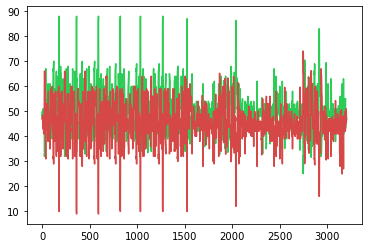

In [136]:
import matplotlib.pyplot as plt

plt.plot(grouped.index, grouped.Biden, color="#2dcc57")
plt.plot(grouped.index, grouped.Trump, color="#d64747")

In [137]:
# Plotting the Difference
diff_by_date = grouped.groupby('start_date')['Biden', 'Trump'].mean().reset_index()
diff_by_date['difference'] = diff_by_date['Biden'] - diff_by_date['Trump']
diff_by_date

C:\Users\Siyam\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,start_date,Biden,Trump,difference
0,2020-08-01,50.142381,47.676381,2.466000
1,2020-08-02,48.800000,47.000000,1.800000
2,2020-08-03,49.500000,43.500000,6.000000
3,2020-08-04,47.916667,44.416667,3.500000
4,2020-08-05,47.661667,43.793333,3.868333
...,...,...,...,...
73,2020-10-14,50.866667,44.766667,6.100000
74,2020-10-15,48.800000,46.700000,2.100000
75,2020-10-16,47.100000,41.900000,5.200000
76,2020-10-17,47.000000,48.400000,-1.400000


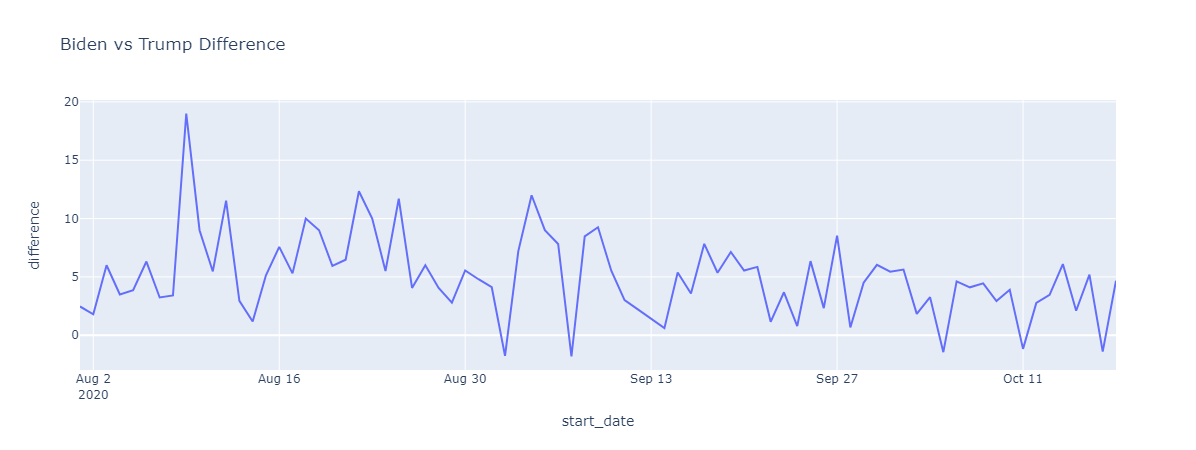

In [138]:
import plotly.express as px
px.line(diff_by_date, x="start_date", y="difference", title='Biden vs Trump Difference')

In [139]:
import seaborn as sns

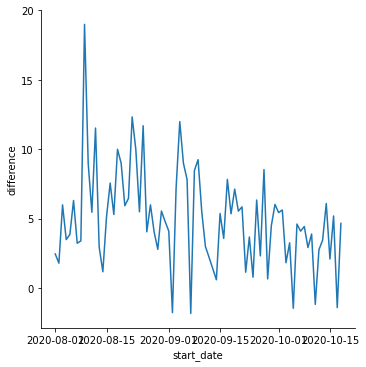

In [140]:
sns.relplot(data=diff_by_date, x="start_date", y="difference", kind="line")

In [145]:
grouped.head(1)

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,join_index,question_id second,...,state second,pollster second,start_date second,end_date second,answer second,pct second,join_index second,Biden,Trump,Seats
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0,2,133816,...,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,3,48.0,47.0,18


# Tidying up our data

In [146]:
polls = grouped[['state','Biden','Trump','Seats']]
polls.head()

,state,Biden,Trump,Seats
1,Ohio,48.0,47.0,18
3,Pennsylvania,50.0,47.0,20
5,Georgia,47.0,48.4,16
7,Pennsylvania,49.0,45.0,20
9,Pennsylvania,49.0,45.0,20


# We Add Centers and Standard Deviations to our Averaged Polling Data

Looking at the polls for each state, if you imagine that the Trump voters are stacked on the top and the Biden votes are stacked up from the bottom, with the undecideds in-between, then an argument can be made for a **very simple model** that positions the actual vote distributed around the average between the two.

For simplicity sake, let's use a normal distribution. 

For every state, we're going to create a normal distribution from 0 to 100. The distribution will be **centered** between the Biden vote and the Trump vote, and the **std dev** will be half the number of undecided votes plus 3.

![](https://i.imgur.com/Zl4iyoy.png)

In [156]:
def get_center(row):
    """"Example calculation, Biden is 48, Trump is 47
    48 + (100-47-48)/2 = 48 + 5/2 = 50.5
    """
    return row["Biden"] + (100 - row["Trump"] - row["Biden"]) / 2

polls['Center'] = polls.apply(get_center, axis = 1)
polls.head(0)

C:\Users\Siyam\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,state,Biden,Trump,Seats,Center


In [158]:
def get_deviation(row):
    return (abs(row['Trump'] - row['Center'])/2)+3

polls['stddev'] = polls.apply(get_deviation, axis=1)
polls

C:\Users\Siyam\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,state,Biden,Trump,Seats,Center,stddev
1,Ohio,48.0,47.0,18.0,50.5,4.75
3,Pennsylvania,50.0,47.0,20.0,51.5,5.25
5,Georgia,47.0,48.4,16.0,49.3,3.45
7,Pennsylvania,49.0,45.0,20.0,52.0,6.50
9,Pennsylvania,49.0,45.0,20.0,52.0,6.50
...,...,...,...,...,...,...
3195,Arizona,48.0,51.0,11.0,48.5,4.25
3197,Florida,49.0,49.0,29.0,50.0,3.50
3199,Pennsylvania,50.0,46.0,20.0,52.0,6.00
3201,Wisconsin,47.0,47.0,10.0,50.0,4.50
